# Pump It Up - Preprocessing
This notebook will describe the Pump it Up dataset, along with which data preprocessing/cleaning steps are required.

Dataset Size: 59401 entries

Num features: 40 features



- Age of the well against functionality 

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_test = pd.read_csv("data/test/test.csv")
df_train = pd.read_csv("data/train/features.csv")
df_train_labels = pd.read_csv("data/train/labels.csv")






In [12]:
df_train["num_private"].value_counts(normalize=True)


0       0.987256
6       0.001364
1       0.001229
5       0.000774
8       0.000774
          ...   
42      0.000017
23      0.000017
136     0.000017
698     0.000017
1402    0.000017
Name: num_private, Length: 65, dtype: float64

11974.0
16042.0


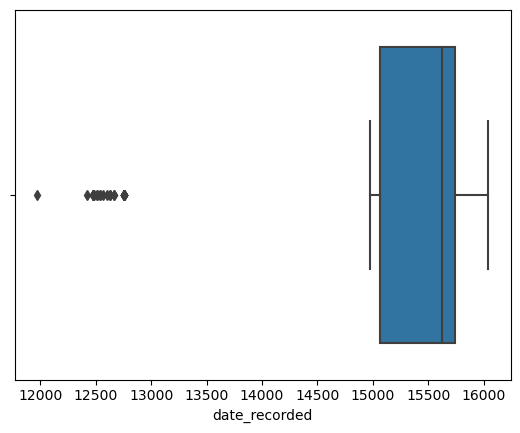

In [21]:
# Find distribution of date_recorded

df_train["date_recorded"] = pd.to_datetime(df_train["date_recorded"])

df_train["date_recorded"] = (df_train["date_recorded"] - pd.Timestamp("1970-01-01")) / pd.Timedelta(days=1)

print(df_train["date_recorded"].min())
print(df_train["date_recorded"].max())

sns.boxplot(x=df_train["date_recorded"])
plt.show()

| Column | Description | Cleaning needed? |
| --- | --- | --- |
| id | Pump ID | Missing ID values, max ID exceeds number of entries. Best to disregard ID and use own IDs |
| amount_tsh | Total Static Head (water available to pump) | 70% of values are 0 - column can potentially be dropped |
| date_recorded | Date row was entered | Some potential outlier values with recorded dates much earlier than others - these could likely be replaced with median value |
| funder | Who funded the well | Some missing values, some non-matching entries (ie. "Government of Tanzania" and "Government/ Community"). |
| num_private | Unclear | 98.7% of data is 0, column can be safely dropped |


